# Group Assignment 3 - UP221 Winter 2024
## Group Name: Food Access in LA County
### Madi Hamilton, Jessica Fay, Meaghan Woody, Branden Bohrnsen

Research Question - are there geographic disparities trends in food insecurity and coronary heart disease in Los Angeles County? 

Updates: new datasets (USC data merged with SPAs & grocery store walkability, regraphed the data for the poverty and predictor/outcome variables with new dataset, included function and loop for fast food data

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import plotly.express as px
import osmnx as ox
import plotly.io as pio
import contextily as ctx
import networkx as nx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [94]:
# Import new, cleaned dataset for USC data merged with SPAs
new = pd.read_csv('mergedoutput.csv', dtype= {'geoid20_x':str})

# Import new, cleaned dataset for Grocery store walkability
grocery = pd.read_csv('cleanedgrocery.csv')

/tmp/ipykernel_4450/2417910133.py:2: DtypeWarning:

Columns (24,25,52,53,72,73,202,203,204,205,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,236,237,238,239,240,241,242,243,244,245,246,247,250,251,252,253,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,330,331,332,333,334,335,336,337,338,339,340,341,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,378,379,380,381,409,412,415) have mixed types. Specify dtype option on import or set low_memory=False.



In [95]:
new.head()

,Unnamed: 0,geoid20_x,ShapeSTArea,ShapeSTLength,geometry_x,pop_below_100_pct,pop_below_200_pct,mental_health_pct,physical_health_pct,diabetes_pct,...,Age Total population,Under 18 years,Percent Under 18 years,0-19 years,65 years and over,Percent 65 years and over,85 years and over,Hispanic or Latino,Percent Hispanic or Latino,Not Hispanic or Latino
0,0,101110,1.229562e+07,15083.854290,"POLYGON ((-118.2979312139962 34.2632268762169,...",11.287386,26.736021,16.309769,10.794954,9.504253,...,4014.0,595.0,14.8,716.0,840.0,20.9,34.0,1082.0,27.0,2932.0
1,1,101122,2.845774e+07,31671.455840,POLYGON ((-118.27743420965825 34.2599078772977...,4.429760,10.499266,13.911290,8.702957,8.299731,...,4164.0,665.0,16.0,729.0,909.0,21.8,149.0,362.0,8.7,3802.0
2,2,101220,7.522093e+06,12698.783810,POLYGON ((-118.27817921018234 34.2557728762786...,16.900661,34.781456,16.807861,11.995934,10.606574,...,3481.0,596.0,17.1,686.0,569.0,16.3,39.0,1463.0,42.0,2018.0
3,3,101221,3.812000e+06,9161.710543,POLYGON ((-118.28734521088782 34.2559088762374...,20.601543,43.918018,18.384296,12.306531,9.890525,...,3756.0,694.0,18.5,805.0,733.0,19.5,182.0,1204.0,32.1,2552.0
4,4,101222,3.191371e+06,9980.600461,POLYGON ((-118.28593621132488 34.2558998758872...,38.019875,66.654396,18.394951,12.308386,9.918846,...,2808.0,512.0,18.2,542.0,459.0,16.3,70.0,1295.0,46.1,1513.0


# Part 1 - Descriptive statistics

<Axes: >

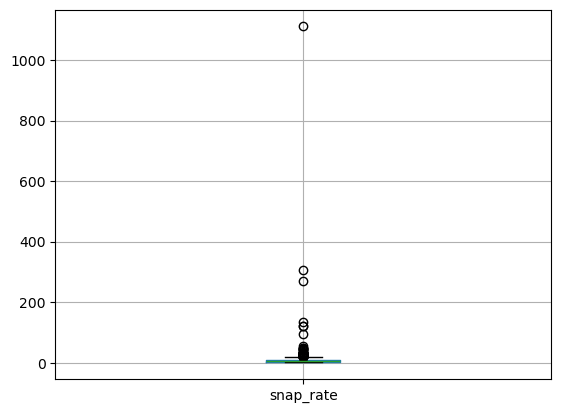

In [96]:
#look at the mean and median population
new['total_pop'].mean() #mean per census tract
new['total_pop'].median() #median across census tracts

#look at mean and median snap acceptance rate
new['snap_rate'].mean() #mean per census tract
new['snap_rate'].median() #median across census tracts

#box plot
new.boxplot(column=['snap_rate'])

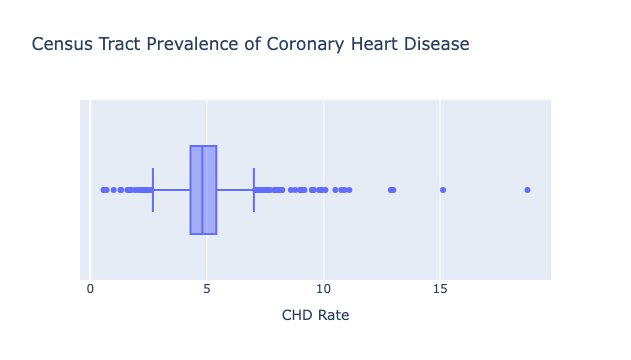

In [97]:
# make boxplots for the distribution of key variables

#SNAP Rate
px.box(data_frame = new
       ,x = 'snap_rate', 
       labels ={
                "snap_rate": "Grocery Store SNAP Acceptance Rate"},
       
       title='Census Tract Grocery Store SNAP Acceptance Rate'
       )
# Coronary Heart Disease Percent
px.box(data_frame = new
       ,x = 'chd_pct', 
        labels ={
                "chd_pct": "CHD Rate"},
       title='Census Tract Prevalence of Coronary Heart Disease'
       )

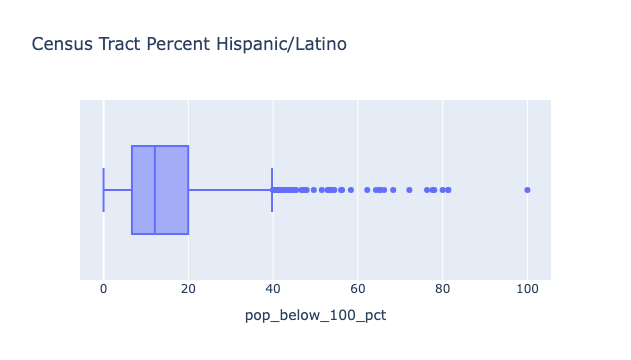

In [98]:
# Look at distribution of Hispanic because in LA, most SNAP participants are Hispanic
px.box(data_frame = new
       ,x = 'pop_below_100_pct', title='Census Tract Percent Hispanic/Latino'
       )

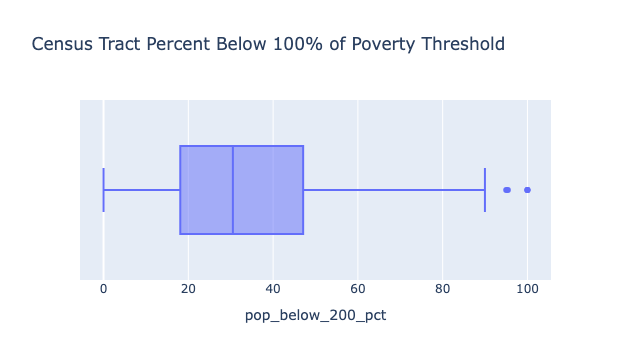

In [99]:
# Look at distribution of % of census that are 100% below poverty threshold
px.box(data_frame = new
       ,x = 'pop_below_200_pct', 
       labels ={
                "pop_below_100_pct": "Percent of Pop Below 100% Poverty Threshold",},
       title='Census Tract Percent Below 100% of Poverty Threshold'
       )

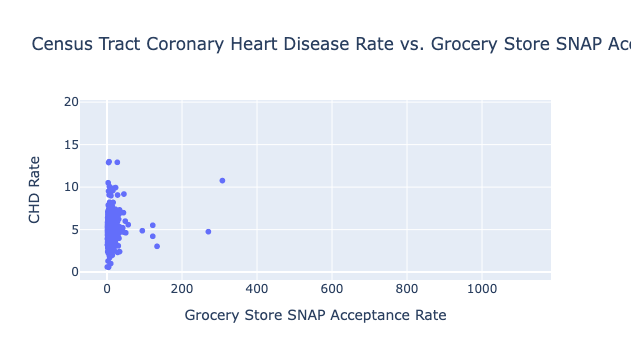

In [100]:
# Initial Correlation of SNAP acceptance and CHD
px.scatter(new, x="snap_rate", y="chd_pct",
            labels ={
                "chd_pct": "CHD Rate",
                "snap_rate": "Grocery Store SNAP Acceptance Rate"},
            title="Census Tract Coronary Heart Disease Rate vs. Grocery Store SNAP Acceptance Rate")

# Part 3 - Loops using OSM

In [101]:
# Define aread of interests
place = 'Downtown, Los Angeles, CA'

osm = ox.features.features_from_address(place, tags={'amenity': ['restaurant','fast_food']})

# examine data
osm.shape
osm.info(verbose=True, show_counts=True)

# subset data set to keep only variables of interest
columns_to_keep = ['amenity','name','brand', 'diet:vegan', 'access', 'geometry']
osm = osm[columns_to_keep]
osm.head(10)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 241 entries, ('node', 470881976) to ('way', 905239708)
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   addr:city             101 non-null    object  
 1   addr:housenumber      122 non-null    object  
 2   addr:state            76 non-null     object  
 3   addr:street           124 non-null    object  
 4   alt_name              6 non-null      object  
 5   amenity               241 non-null    object  
 6   historic              1 non-null      object  
 7   name                  240 non-null    object  
 8   website               50 non-null     object  
 9   wheelchair            14 non-null     object  
 10  wikipedia             1 non-null      object  
 11  geometry              241 non-null    geometry
 12  air_conditioning      4 non-null      object  
 13  bar                   4 non-null      object  
 14  cuisine          

amenity                name       brand diet:vegan  \
element_type osmid                                                              
node         470881976  restaurant  Cole's P.E. Buffet         NaN        NaN   
             470881995  restaurant       Bottega Louie         NaN        NaN   
             470888480  restaurant          The Mighty         NaN        NaN   
             470888534  restaurant             Lili Ya         NaN        NaN   
             470891322   fast_food          Carl's Jr.  Carl's Jr.        NaN   
             471255269  restaurant        Drago Centro         NaN        NaN   
             471255278  restaurant              Ciudad         NaN        NaN   
             471255285  restaurant             Wokcano         NaN        NaN   
             471255286  restaurant       Wolfgang Puck         NaN        NaN   
             471255287   fast_food              Subway      Subway        NaN   

                       access                     geometry  
element_type osmid                                          
node         470881976    NaN  POINT (-118.24956 34.04483)  
             470881995    NaN  POINT (-118.25657 34.04704)  
             470888480    NaN  POINT (-118.24474 34.05100)  
             470888534    NaN  POINT (-118.24490 34.05113)  
             470891322    NaN  POINT (-118.25336 34.04490)  
             471255269    NaN  POINT (-118.25710 34.05130)  
             471255278    NaN  POINT (-118.25720 34.05260)  
             471255285    NaN  POINT (-118.25906 34.04869)  
             471255286    NaN  POINT (-118.25637 34.04926)  
             471255287    NaN  POINT (-118.25601 34.04904)

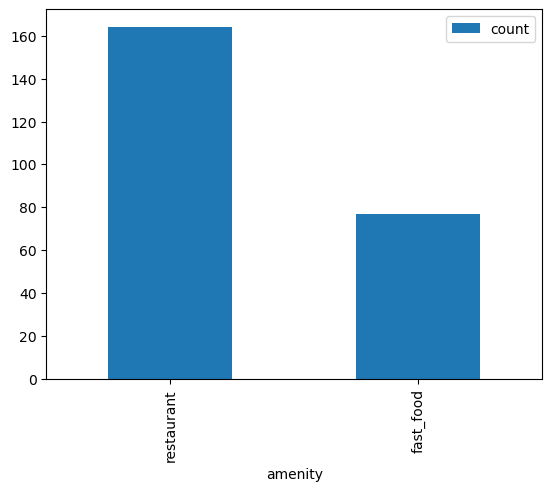

In [102]:
# get the counts of outlet by restaurant type
osm_food_counts = osm.value_counts(['amenity']).reset_index(name="count")
osm_food_counts

# create bar chart of food outlet type
osm_food_counts.plot.bar(x='amenity');

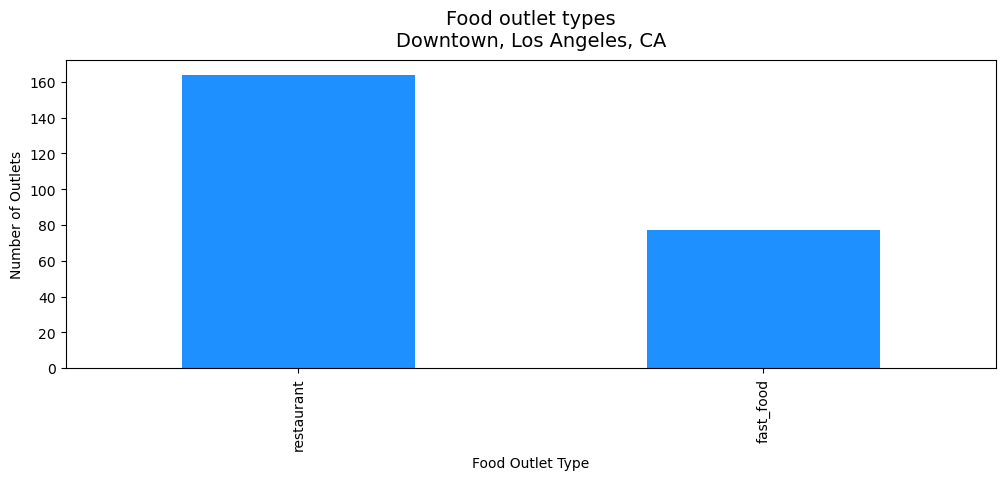

In [103]:
# create enhanced bar chart

# create empty figure and axis where dataframe will be plotted
fig, ax = plt.subplots(figsize=(12,4))

# plot top ten building types with counts 
osm_food_counts[:10].plot.bar(ax=ax,
                                      x='amenity',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )

ax.set_xlabel('Food Outlet Type') # override x label
ax.set_ylabel('Number of Outlets') # override y label
ax.set_title("Food outlet types\n"+place,fontsize=14,pad=10); # multi-line title with padding

In [104]:
# list the templates available
pio.templates

# set template theme
pio.templates.default = "seaborn"

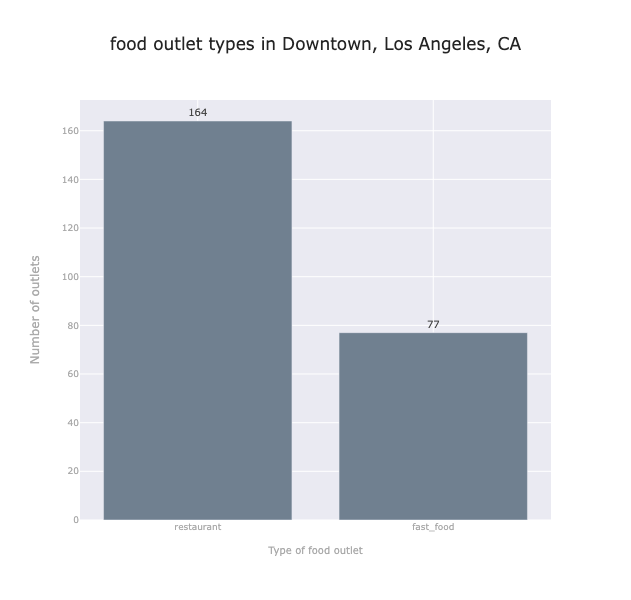

<Figure size 640x480 with 0 Axes>

In [105]:
# make bar chart with new theme
fig = px.bar(osm_food_counts.head(10),
        x='amenity',
        y='count',
        title="food outlet types in "+place, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_food_counts), # single color for all the bars
        labels={
                'count': 'Number of outlets',
                'amenity': 'Type of food outlet',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()
plt.savefig('city-name.png')

<Axes: >

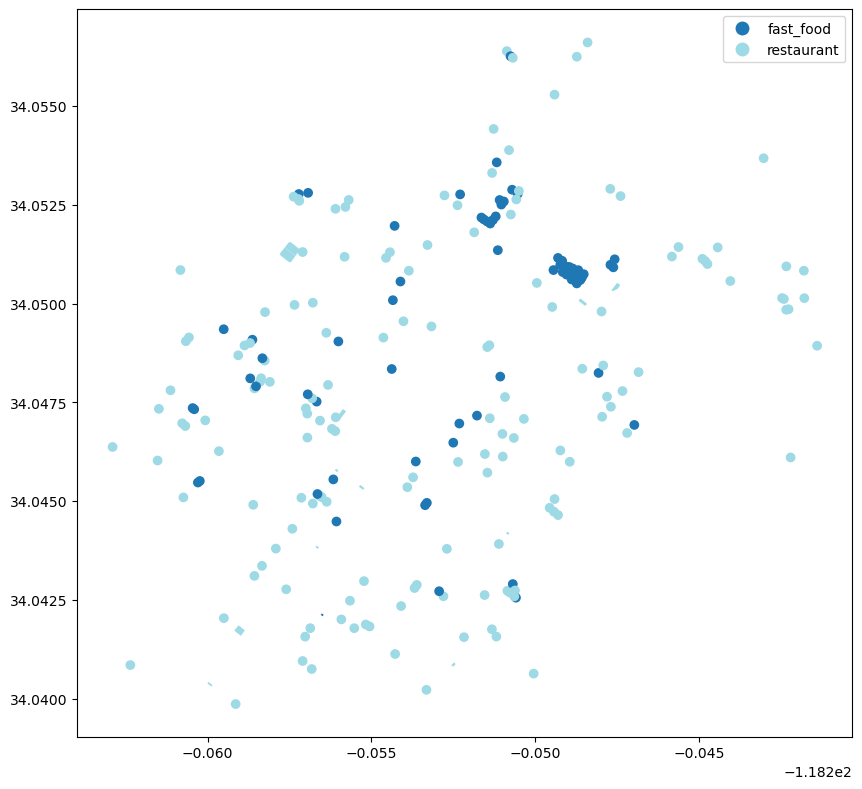

In [106]:
#examine osm data again
osm.shape
osm.dtypes

#create a plot of the fast food and restaurants in dtla
osm.plot(figsize=(10,10),
         column='amenity',
         cmap='tab20',
         legend=True)

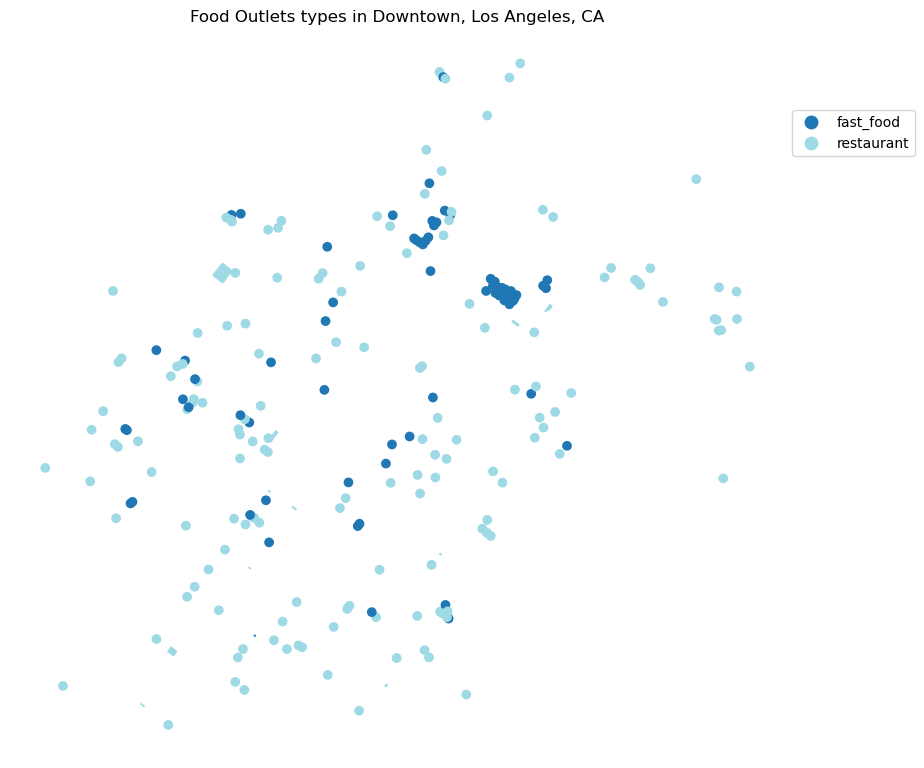

In [107]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='amenity',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Food Outlets types in ' + place)

# get rid of the axis
ax.axis('off');

In [108]:
# define geography bounds
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

# get unique buiding types in a list
foodtypes = osm['amenity'].unique().tolist()
foodtypes

['restaurant', 'fast_food']

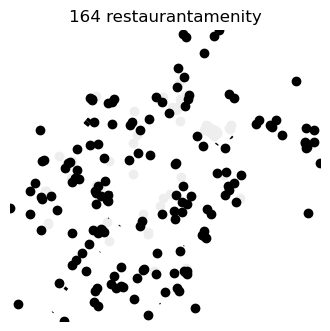

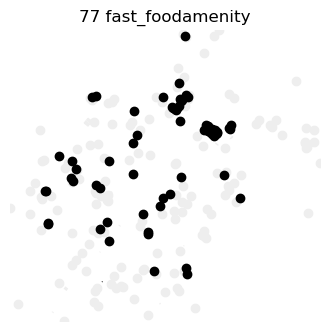

In [109]:
# loop through food outlet types
for type in foodtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    osm.plot(ax=ax,
            # column='amenity',
            color='#eee')

    # create the map plot
    osm[osm['amenity'] == type].plot(ax=ax,
            # column='amenity',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_outlets = len(osm[osm['amenity']==type])
    ax.set_title(str(number_of_outlets) + ' ' + type + 'amenity')

    # get rid of the axis
    ax.axis('off');

In [110]:
 # add a base map
#reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

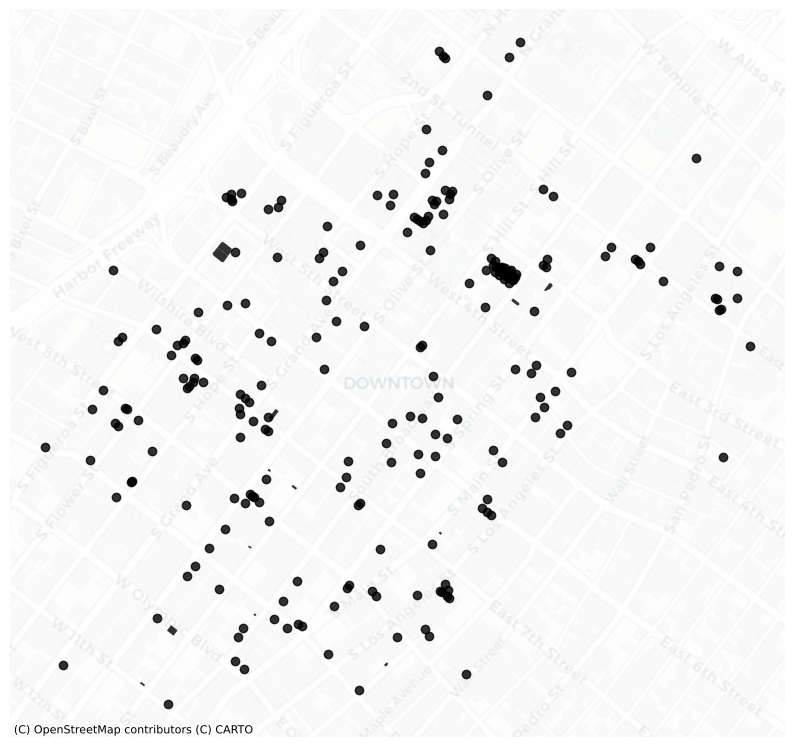

In [111]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.CartoDB.Positron,
                alpha=0.3 # add transparency to make it less dominant
                )
plt.savefig('LA.png')

In [112]:
# create a function to create a map
def make_food_map(place):
 
    # get the data from osm
    osm = ox.features.features_from_address(place,
                                    tags={'amenity': ['restaurant','fast_food']},
                                    dist=500)

    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)

    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(10,10))
    
    # add the map
    osm_web_mercator.plot(ax=ax,
                          column='amenity',
                          cmap='tab20',
                          legend=True,
                          legend_kwds={'loc' :'upper left','bbox_to_anchor':(1,1)})
                
    # add a title
    ax.set_title("Food outlet Types in" + place)

    # get rid of the axis
    ax.axis('off')  
    
    #add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [113]:
#make a list of places to loop through
place_list=[' Downtown, Los Angeles, CA', 'Westlake, Los Angeles', 'Westwood, Los Angeles, CA']

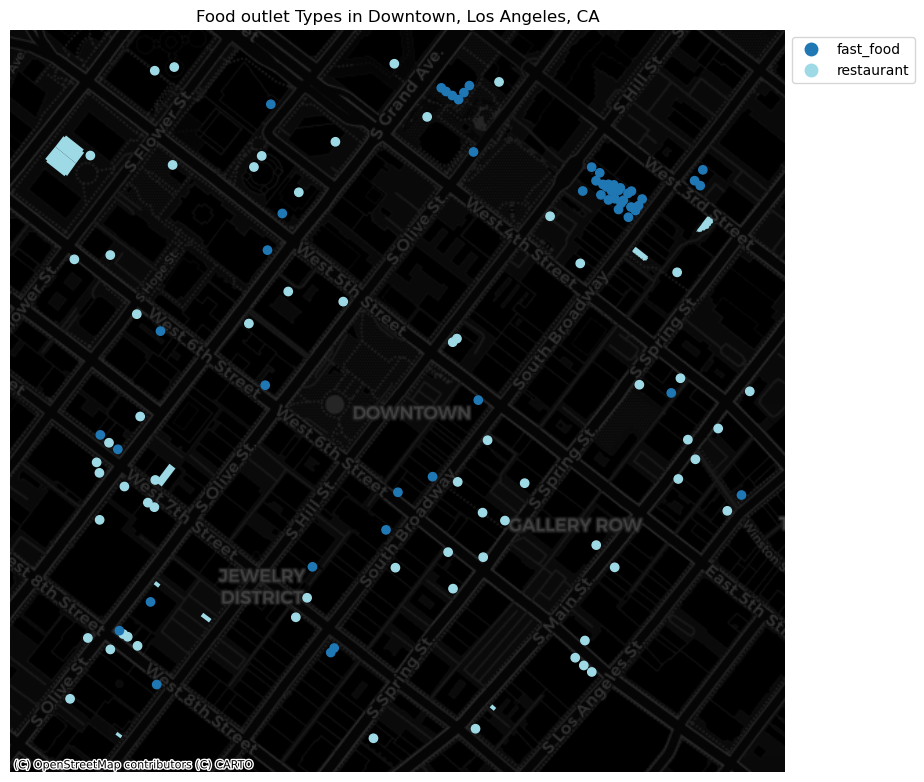

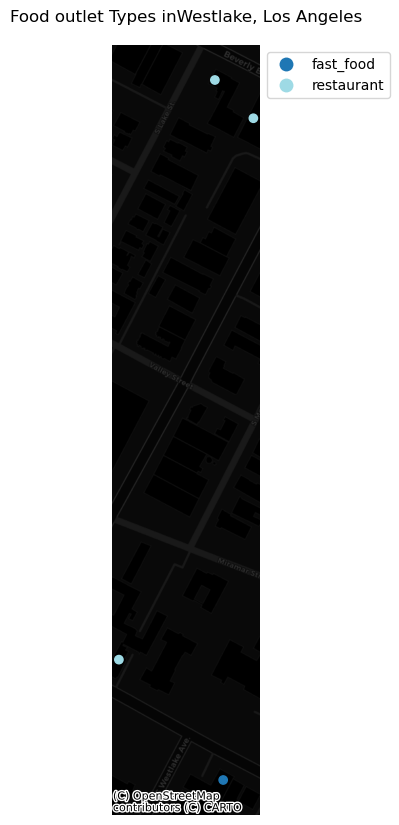

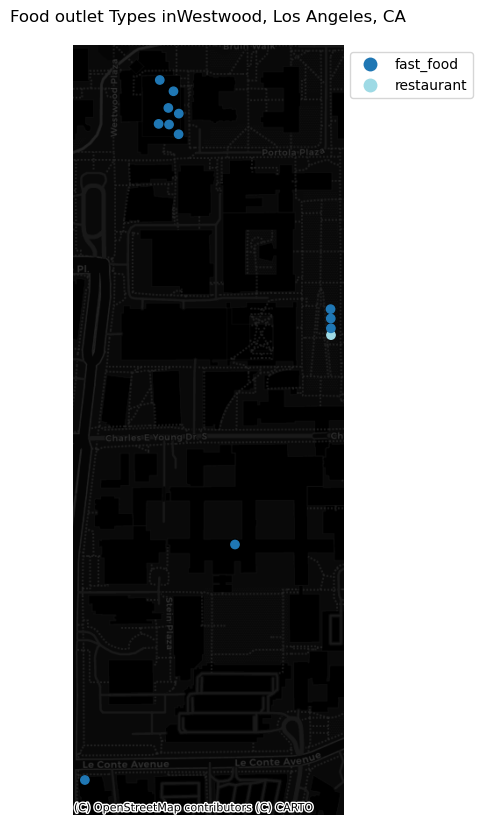

In [114]:
#execute for loop
for place in place_list:
    make_food_map(place)